# OASIS INFOBYTE Data Analytics Internship

## Task 2 - Customer Segmentation Analysis

Project Description:

The aim of this data analytics project is to perform customer segmentation analysis for an e-
commerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.

### 1. Data Loading

First, obtain the dataset containing customer information, purchase history, and other relevant data.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#Library to remove warnings after code excecution
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [41]:
#Load Dataset 
df= pd.read_csv('ifood_df.csv') 

In [3]:
# Display the first few rows of the dataset
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


### 2. Data Cleaning

Handle missing or inconsistent data by filling or removing entries as needed.

In [4]:
# Check for missing values
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [5]:
# Summary statistics
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [6]:
# Fill missing values with the median or mean, or drop rows/columns
df['Income'].fillna(df['Income'].median(), inplace=True)
df.dropna(inplace=True)  # Drop rows with any missing values


In [7]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


### 3. Outlier Detection and Removal

Outliers can be detected using the interquartile range (IQR) method, which is useful for continuous features like income and spending.

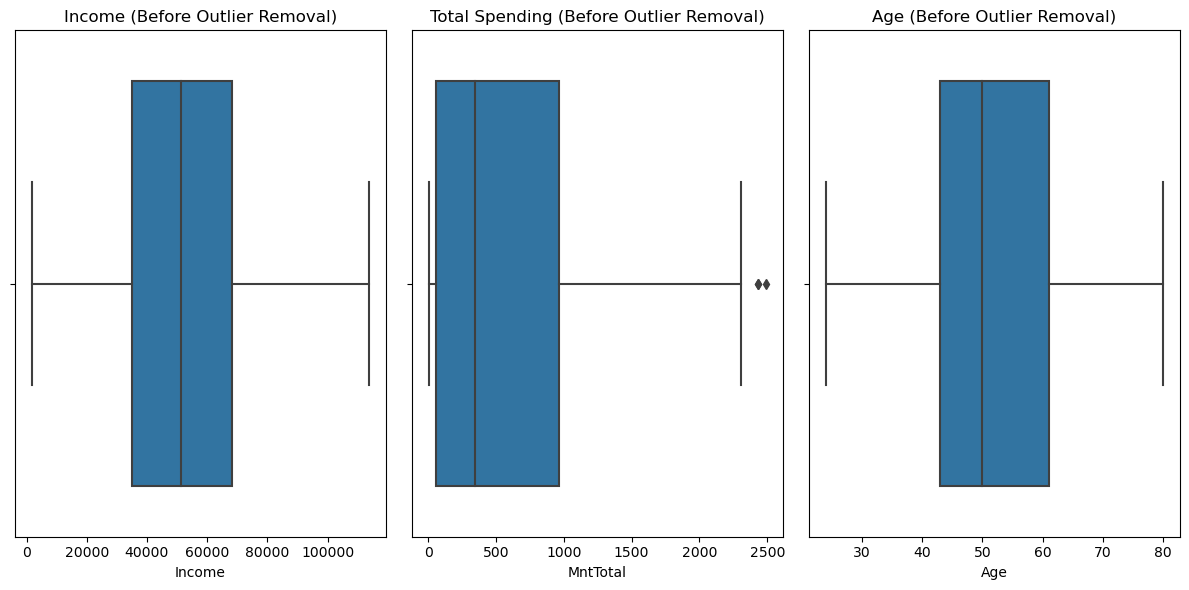

In [24]:
# Boxplot of features before removing outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Income'])
plt.title('Income (Before Outlier Removal)')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['MntTotal'])
plt.title('Total Spending (Before Outlier Removal)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Age'])
plt.title('Age (Before Outlier Removal)')

plt.tight_layout()
plt.show()

In [21]:
# Define function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [22]:
# Apply the function to remove outliers from relevant columns
df_cleaned = remove_outliers(df, 'Income')
df_cleaned = remove_outliers(df_cleaned, 'MntTotal')
df_cleaned = remove_outliers(df_cleaned, 'Age')

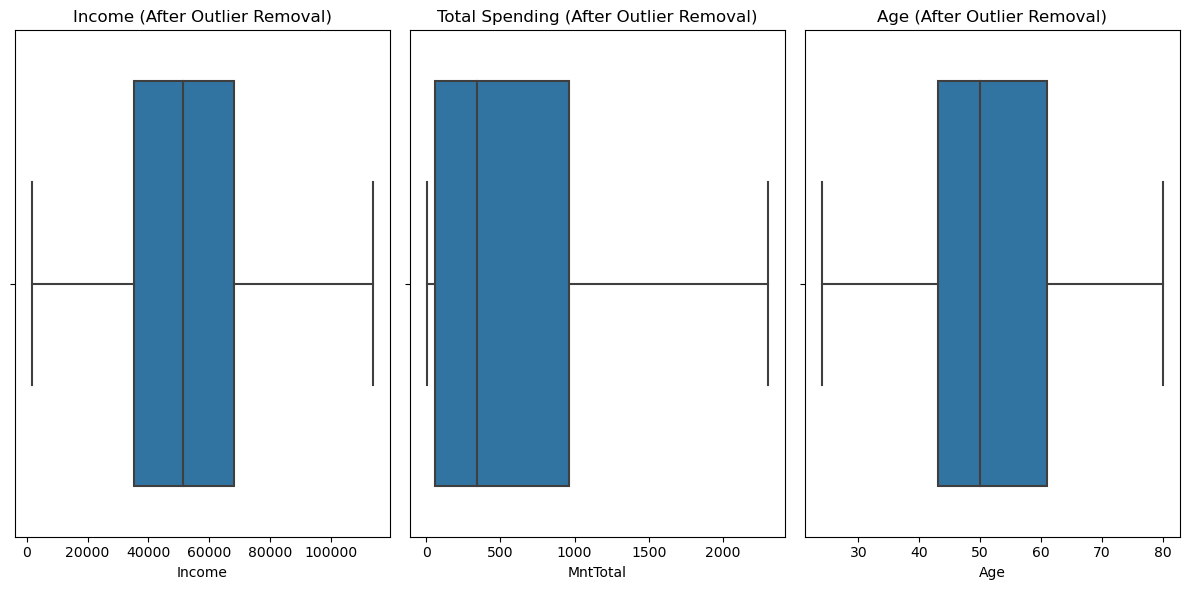

In [25]:
# Boxplot of features after removing outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df_cleaned['Income'])
plt.title('Income (After Outlier Removal)')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_cleaned['MntTotal'])
plt.title('Total Spending (After Outlier Removal)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df_cleaned['Age'])
plt.title('Age (After Outlier Removal)')

plt.tight_layout()
plt.show()


Reason: Outliers can distort clustering by pulling centroids in the wrong direction, so removing them improves the accuracy of the clustering process.

### 4. Data Visualization Before Clustering

Visualize important features to understand distributions and relationships before clustering.

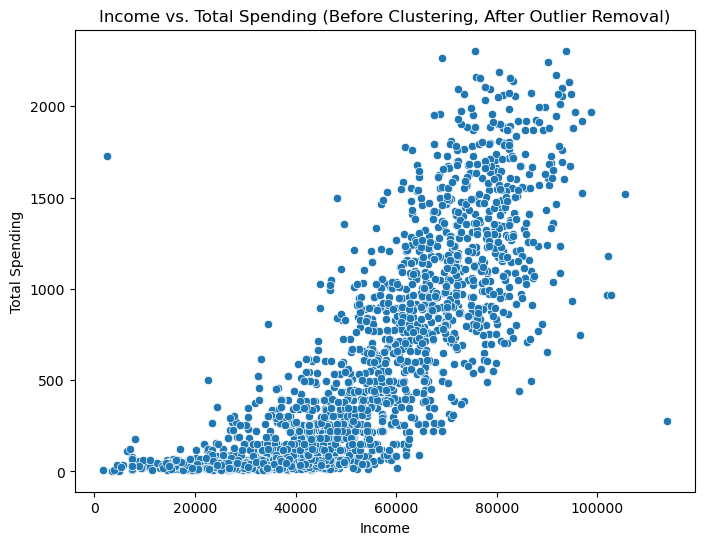

In [27]:
# Scatter plot to visualize Income vs. Total Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df_cleaned)
plt.title('Income vs. Total Spending (Before Clustering, After Outlier Removal)')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()



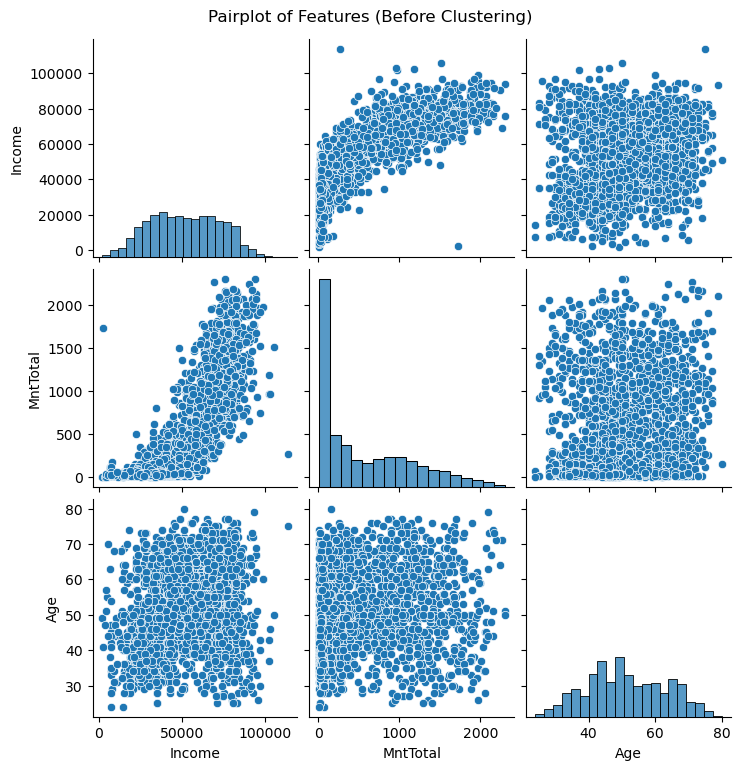

In [28]:
# Pairplot to explore relationships among features
sns.pairplot(df_cleaned[['Income', 'MntTotal', 'Age']])
plt.suptitle('Pairplot of Features (Before Clustering)', y=1.02)
plt.show()

### 5. Data Standardization

Standardize the data to ensure that all features contribute equally to the clustering process.

In [12]:
from sklearn.preprocessing import StandardScaler

In [29]:
# Select features for clustering
features = df_cleaned[['Income', 'MntTotal', 'Age']]

In [30]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [33]:
print(features_scaled)

[[ 0.3176686   1.69381492  1.01630446]
 [-0.2527859  -0.94270124  1.27304279]
 [ 0.96943004  0.30387437  0.33166892]
 ...
 [ 0.2617066   1.14832882 -1.03760216]
 [ 0.85489415  0.38779531  1.10188391]
 [ 0.06281658 -0.71541536  1.27304279]]


Reason: Standardization is essential for clustering algorithms like K-Means, which are sensitive to the scale of the data.

### 6. Customer Segmentation Using K-Means Clustering

Apply K-Means clustering to segment customers into distinct groups.

In [15]:
#importing k-means library form sklearn
from sklearn.cluster import KMeans

In [50]:
# Fit the K-Means model with an appropriate number of clusters
model = KMeans(n_clusters=4, random_state=7)
df_cleaned['Cluster'] = model.fit_predict(features_scaled)

Reason: K-Means helps in identifying natural groupings within the data based on customer behavior.

### 7. Visualization After Clustering

Visualize the clusters formed to analyze the segmentation.

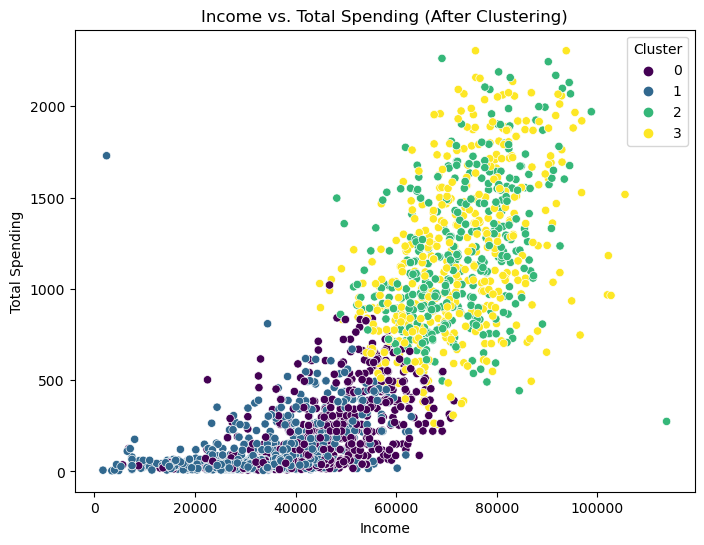

In [35]:
# Scatter plot to visualize the clusters based on Income and Total Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df_cleaned, palette='viridis')
plt.title('Income vs. Total Spending (After Clustering)')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

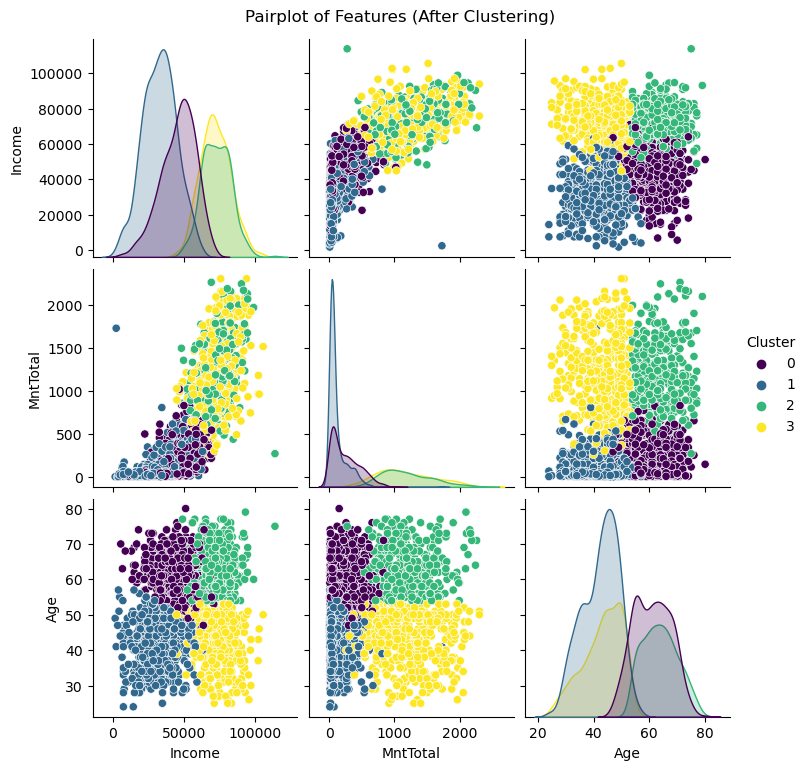

In [36]:
# Pairplot of clusters
sns.pairplot(df_cleaned[['Income', 'MntTotal', 'Age', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Features (After Clustering)', y=1.02)
plt.show()

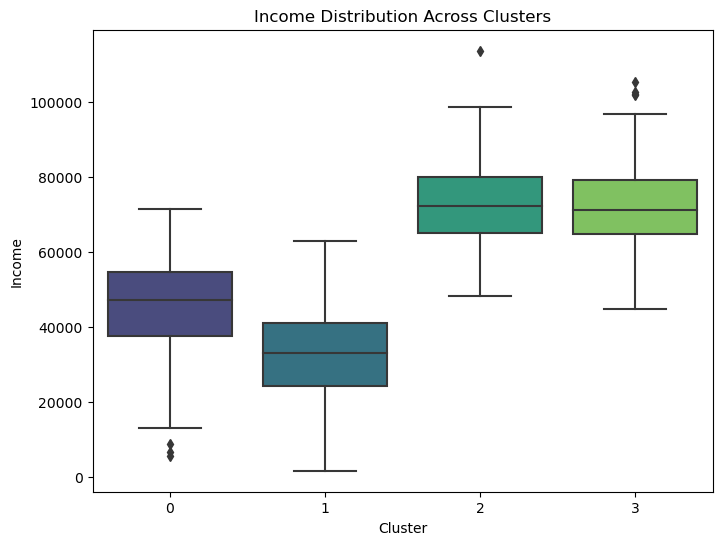

In [37]:
# Boxplot to compare Income distribution across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df_cleaned, palette='viridis')
plt.title('Income Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

Reason: Visualizing the clusters allows for an easy interpretation of customer segments, identifying key characteristics that differentiate each group.

### 8. Insights and Recommendations

Analyze the characteristics of each customer segment and derive actionable insights.

In [39]:
# Calculate average values for each cluster
cluster_summary = df_cleaned.groupby('Cluster').mean()
cluster_summary

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Cluster,,,,,,,,,,,,,,,,,,,,,
0,45866.755319,0.452128,0.893617,49.968085,159.301418,10.058511,51.920213,13.748227,10.333333,30.028369,...,0.299645,0.044326,0.058511,0.012411,0.466312,0.210993,0.251773,245.361702,215.333333,0.118794
1,32885.707692,0.823077,0.306410,47.933333,55.483333,6.837179,33.844872,10.330769,6.850000,21.841026,...,0.233333,0.014103,0.121795,0.060256,0.508974,0.152564,0.156410,113.346154,91.505128,0.100000
2,72730.212276,0.030691,0.462916,49.314578,650.480818,51.373402,352.544757,76.754476,52.882353,73.787724,...,0.253197,0.081841,0.076726,0.000000,0.488491,0.161125,0.273657,1184.035806,1110.248082,0.552430
3,71949.783726,0.141328,0.413276,49.449679,608.267666,57.203426,360.473233,79.539615,58.959315,73.014989,...,0.250535,0.017131,0.085653,0.000000,0.558887,0.130621,0.224839,1164.443255,1091.428266,0.629550


#### 1. Boxplots Before and After Outlier Removal:

Income: Visualize income distribution to ensure that extreme values (outliers) are addressed.

Spending: Compare spending patterns before and after outlier removal to assess any significant shifts.

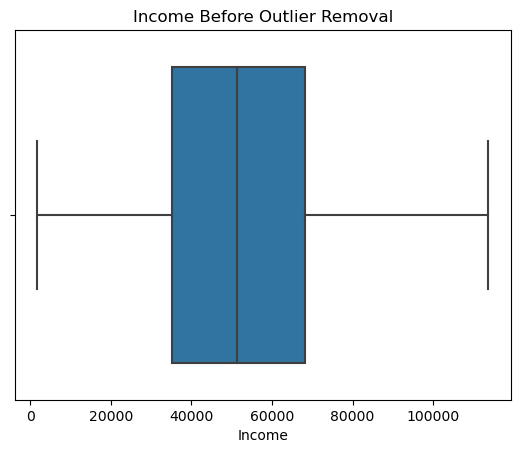

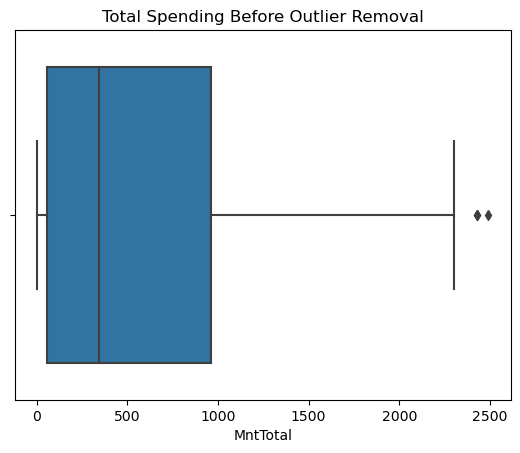

In [47]:
# Boxplot for Income before outlier removal
sns.boxplot(x='Income', data=df)
plt.title('Income Before Outlier Removal')
plt.show()

# Boxplot for MntTotal before outlier removal
sns.boxplot(x='MntTotal', data=df)
plt.title('Total Spending Before Outlier Removal')
plt.show()

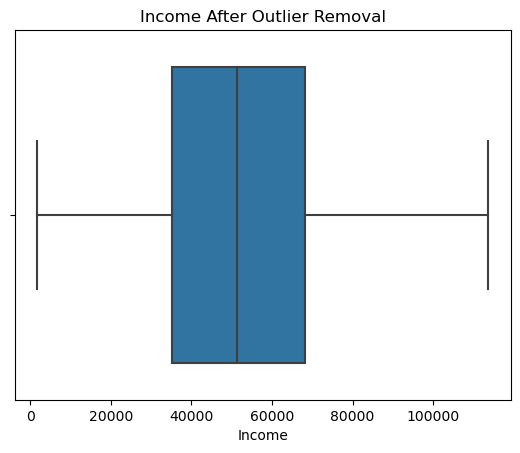

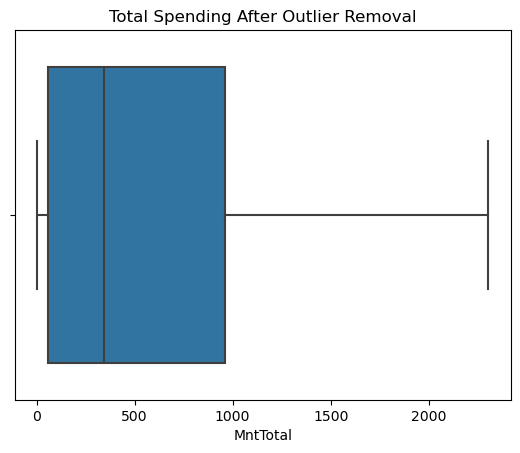

In [46]:
# Boxplot after outlier removal
sns.boxplot(x='Income', data=df_cleaned)
plt.title('Income After Outlier Removal')
plt.show()

sns.boxplot(x='MntTotal', data=df_cleaned)
plt.title('Total Spending After Outlier Removal')
plt.show()


#### 2. Cluster Visualization:

Use scatter plots or bar charts to visualize how customers are grouped into clusters based on key features like income, spending, and campaign participation.

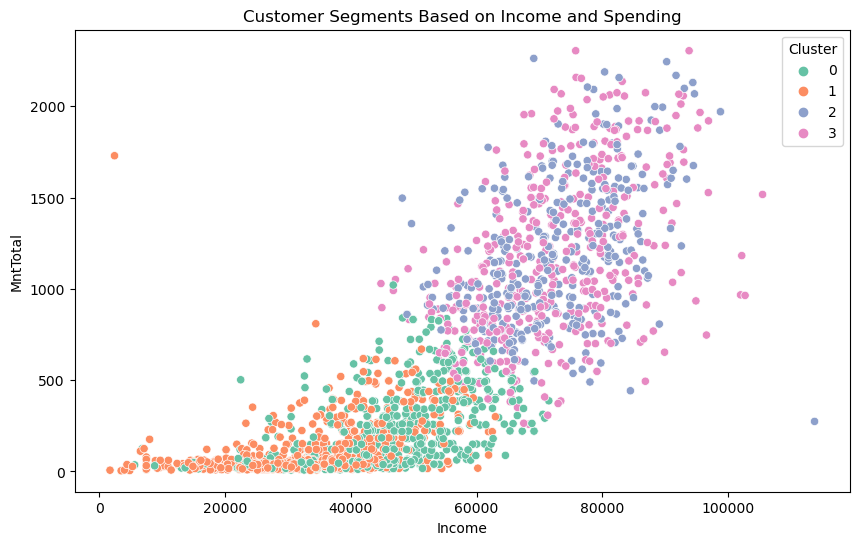

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df_cleaned, palette='Set2')
plt.title('Customer Segments Based on Income and Spending')
plt.show()


These steps will provide a comprehensive view of customer segments, highlight key insights, and suggest targeted strategies for each segment.

# Insights and Recommendations Summary

insights_recommendations = """
# Insights and Recommendations

## Insights

1. **Cluster 0 (Low-income, Moderate Family Size, Low Engagement)**:
   - **Income**: ~$45,867
   - **Spending**: Low average total spending (~$245)
   - **Family**: More teens than kids
   - **Product Preferences**: Low spending across all categories; some preference for wine.
   - **Engagement**: Low response to promotions (AcceptedCmpOverall = 0.12).
   - **Insight**: This cluster consists of low-income customers with minimal spending on non-essential goods and low promotional engagement.

2. **Cluster 1 (Lower-income, Large Families)**:
   - **Income**: ~$32,886
   - **Spending**: Lowest average total spending (~$113)
   - **Family**: More kids than teens
   - **Product Preferences**: Moderate spending on wine, but low on other products.
   - **Engagement**: Low promotion engagement (AcceptedCmpOverall = 0.10).
   - **Insight**: This cluster represents price-sensitive families with low spending, making them less responsive to premium products.

3. **Cluster 2 (High-income, Low Family Size, High Spending)**:
   - **Income**: ~$72,730
   - **Spending**: High average total spending (~$1,184)
   - **Family**: Few kids or teens
   - **Product Preferences**: High spending on premium products like wine and meat.
   - **Engagement**: High promotion engagement (AcceptedCmpOverall = 0.55).
   - **Insight**: These high-income customers are valuable for targeted marketing due to their high spending and promotional engagement.

4. **Cluster 3 (High-income, Moderate Family Size, High Engagement)**:
   - **Income**: ~$71,950
   - **Spending**: Similar to Cluster 2 (~$1,164)
   - **Family**: Moderate family size
   - **Product Preferences**: High spending on premium products.
   - **Engagement**: Very high promotion engagement (AcceptedCmpOverall = 0.63).
   - **Insight**: This cluster is similar to Cluster 2 but with slightly larger families and even more engagement with promotions.

## Recommendations

1. **Cluster 0**: **Increase Engagement Through Discounts**
   - Offer discounts on essentials like meat and wine to boost engagement and spending.

2. **Cluster 1**: **Offer Family-focused Bundles**
   - Create discounted bundles for family essentials to cater to price-sensitive customers.

3. **Cluster 2**: **Focus on Premium Product Offers**
   - Target high-income customers with exclusive offers on premium products to enhance loyalty.

4. **Cluster 3**: **Strengthen Loyalty Programs**
   - Expand loyalty programs with rewards and incentives to increase engagement and retention among high spenders.
"""




Name- Aman Choudhary

Email address- amanchoudhary11189.ac@gmail.com

linkedin Profile- https://www.linkedin.com/in/aman-choudhary-61a9361a0/

Portfolio- https://amanchoudhary1997.github.io/amanchoudhary.github.io/